# Lab 3. Genetic Algorithms
# Task 3.2 The 8-Queens Problem
## Problem Descriptions
The 8-queens problem is to place 8 queens on an 8x8 chessboard so that no queens
attacking each other, i.e. no two or more queens on the same row, column or
diagonal. 
## Implementation and Results

In [2]:
!pip install deap
import random
import numpy as np
from deap import algorithms, base, creator, tools


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 8.0 MB/s eta 0:00:00


In [4]:
NB_QUEENS = 8

def evalNQueens(individual):

    # create 2 list for the falling diagonal (fd) and the raising diagonal (rd)
    fd = np.zeros(2*NB_QUEENS-1)
    rd = np.zeros(2*NB_QUEENS-1)

    # count the number of queens placed on diagonals fd/rd
    for i in range(NB_QUEENS):
      fd[i+individual[i]] += 1
      rd[NB_QUEENS-1-i+individual[i]] += 1

    # sum the number of queens if more than 1 queen on a diagonal
    return np.sum(fd[fd>1]) + np.sum(rd[rd>1]),
    

In [5]:
# enforce only 1 queen per column by using a list of NB_QUEENS
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# enforce only 1 queen per row by using permutation
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(NB_QUEENS), NB_QUEENS)

# register all elements of the GA
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalNQueens)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=2.0/NB_QUEENS)
toolbox.register("select", tools.selTournament, tournsize=3)

In [6]:
# run the GA to get the result
random.seed(64)
pop = toolbox.population(n=300)
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, verbose=False)
best = tools.selBest(pop, 1)[0]
print("Best: %s. Fitness value: %s" %(best, best.fitness.values[0]))

Best: [5, 3, 1, 7, 4, 6, 0, 2]. Fitness value: 0.0


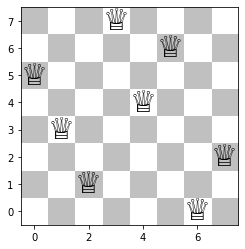

In [ ]:
# display the result
import matplotlib.pyplot as plt

chessboard = np.ones((NB_QUEENS, NB_QUEENS))
chessboard[1::2,0::2] = 0.75
chessboard[0::2,1::2] = 0.75
plt.imshow(chessboard, cmap='gray', origin='lower', vmin=0, vmax=1)
for x in range(NB_QUEENS):
    plt.text(x, best[x], '♕', fontsize=30, ha='center', va='center')

In [7]:
NB_QUEENS = 12

def evalNQueens(individual):

    # create 2 list for the falling diagonal (fd) and the raising diagonal (rd)
    fd = np.zeros(2*NB_QUEENS-1)
    rd = np.zeros(2*NB_QUEENS-1)

    # count the number of queens placed on diagonals fd/rd
    for i in range(NB_QUEENS):
      fd[i+individual[i]] += 1
      rd[NB_QUEENS-1-i+individual[i]] += 1

    # sum the number of queens if more than 1 queen on a diagonal
    return np.sum(fd[fd>1]) + np.sum(rd[rd>1]),

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# enforce only 1 queen per row by using permutation
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(NB_QUEENS), NB_QUEENS)

# register all elements of the GA
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalNQueens)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=2.0/NB_QUEENS)
toolbox.register("select", tools.selTournament, tournsize=3)
random.seed(64)
pop = toolbox.population(n=300)
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, verbose=False)
best = tools.selBest(pop, 1)[0]
print("Best: %s. Fitness value: %s" %(best, best.fitness.values[0]))

/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Best: [4, 7, 9, 6, 2, 0, 11, 8, 10, 1, 3, 5]. Fitness value: 0.0


## Discussions

we have used GA to solve the 8 queen problem.

 encoding scheme: initial population in an array with its structure as 

 * [r][c]

 r is the row number which is array index

 c is the colum number which is array index element.

selection: tournament selection

fitness function: we design fitness function function in such a way that less number of queen attacking each other, better the individual.

* 8 queeen

 for 8 queen our solution came as 

    * [5, 3, 1, 7, 4, 6, 0, 2]

* 12 queen
 
 for 12 queen our solution came as 
    * 4, 7, 9, 6, 2, 0, 11, 8, 10, 1, 3, 5]

